## Preamble

In [281]:
## Importing packages
import numpy as np               # Array manipulation
import pandas as pd              # Data Manipulation
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns            # Statistical plotting
from scipy import stats
import re                        # Python function for using regular expressions

## Seaborn theme settings - pretty plots <3
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
#sns.set_theme(context="paper",  style="white", palette="dark", font_scale = 2, rc=custom_params) # option 1
#sns.set_theme(context="paper", style="white", palette="dark", font_scale = 1.5, rc=custom_params) # option 2
sns.set_theme(context="paper", style="dark", font_scale = 1.5, rc=custom_params) # option 3

## Plotly for dynamic data
import plotly.express as px # delete?

# Tools for particle tracking - and particle tracking analysis
# Not a standard package, so has to be reinstalled every runtime ...
#!pip install trackpy
#import trackpy as tp

In [282]:
### to do: eliminate storage on gDrive, make notebook function for anyone with the link ###

# only run once per runtime
from google.colab import drive
drive.mount('/content/drive') # mount gDrive

# change working dir
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/Nanobio 1/Practicals")
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data.csv	  export_spots.csv   MM				       Plots
export_edges.csv  export_tracks.csv  particle_tracking_analysis.ipynb


## **Data**

In [283]:
## importing .csv files w Pandas.
# 'low_memory=False' required because of data types and/or size? Not an issue on Erda, but Colab raised an exception.
file_spots = pd.read_csv('export_spots.csv', sep=',', low_memory=False)
file_tracks = pd.read_csv('export_tracks.csv', sep=',', low_memory=False)
file_links = pd.read_csv('export_edges.csv', sep=',', low_memory=False)


## Cleaing up dataframes (dfs) and defining functions for each.

# spots files probably not needed
spots_units = file_spots[1:3] #units
file_spots = file_spots[3:]
file_spots = file_spots[[i for i in list(file_spots.columns) if i !=('LABEL') and i !=('MANUAL_SPOT_COLOR') ]].astype('float32')

tracks_units = file_tracks[1:3] #units
file_tracks = file_tracks[3:]
file_tracks = file_tracks[[i for i in list(file_tracks.columns) if i !=('LABEL') ]].astype('float32')

links_units = file_links[1:3] #units
file_links = file_links[3:]
file_links = file_links[[i for i in list(file_links.columns) if i !=('LABEL') and i !=('MANUAL_EDGE_COLOR') ]].astype('float32')

In [284]:
## Uncomment to view the dfs

## Tracks DF
#file_tracks[file_tracks['TRACK_ID']==tracks_by_size[1]]
#file_tracks.sort_values(by=['TRACK_DURATION'], ascending=False)
# file_tracks

## Links DF
#file_links[file_links['TRACK_ID']==6475.0].sort_values(by=['EDGE_TIME'], ascending=True)
#file_links

## Spots DF
#file_spots[file_spots['TRACK_ID']==6475.0].sort_values(by=['POSITION_T'], ascending=True)
#file_spots

## Michaelis-Menten Kinetics

calibration
10pM
Mean=0.134015
SEM=0.002205


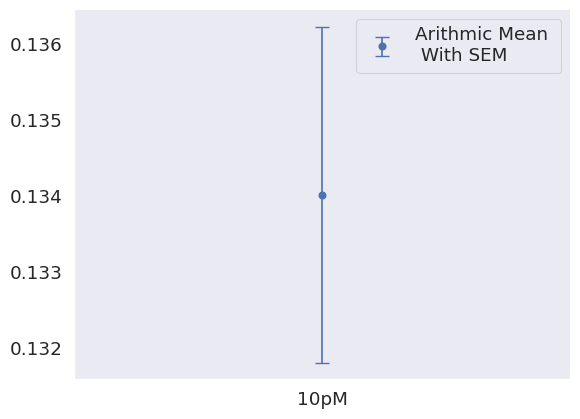

---------------------
calibration
100pM
Mean=0.161015
SEM=0.002493


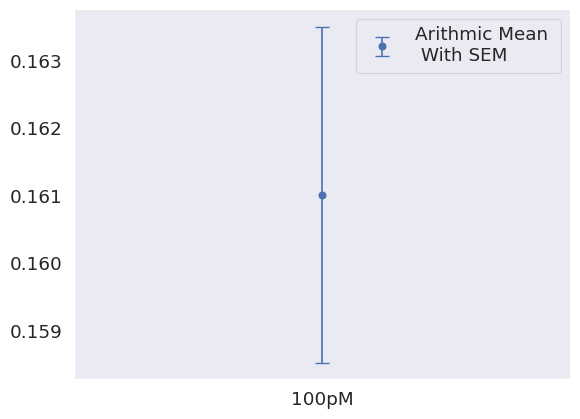

---------------------
calibration
1nM
Mean=0.632642
SEM=0.002031


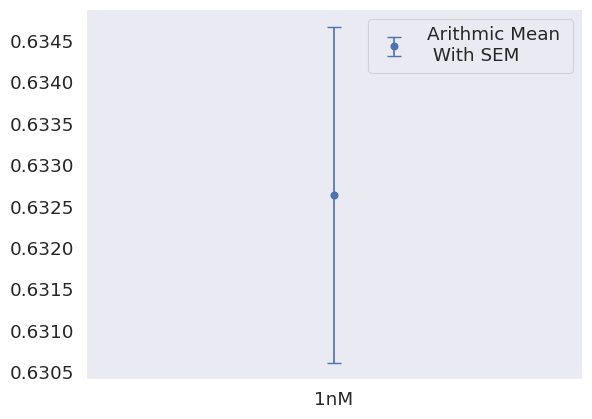

---------------------
calibration
10nM
Mean=7.344664
SEM=0.003185


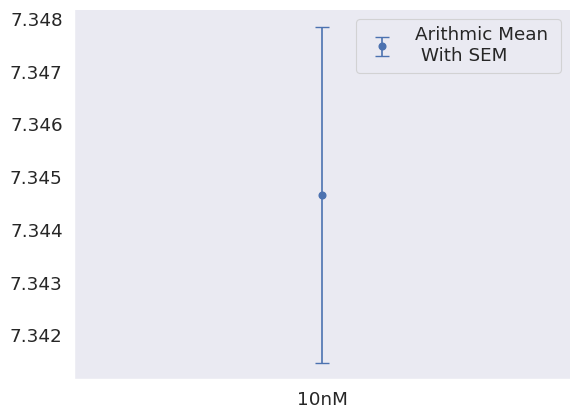

---------------------
calibration
50nM
Mean=49.957309
SEM=0.015061


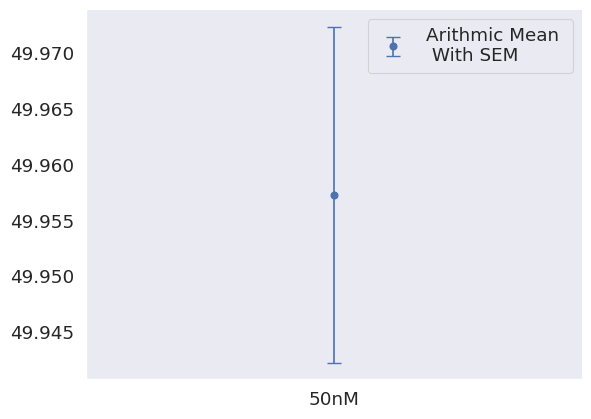

---------------------
calibration
100nM
Mean=49.969936
SEM=0.021557


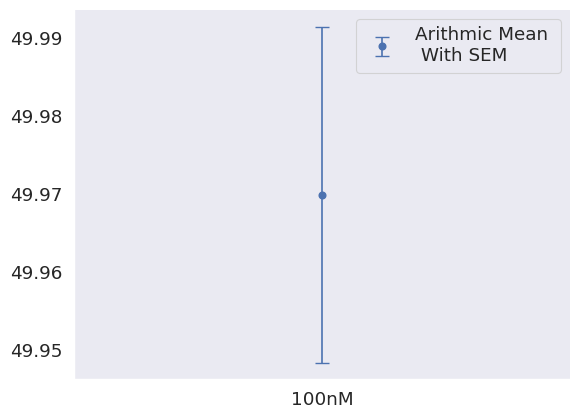

---------------------
len(mean)=6
len(SEM)=6
len(concentration)=6
########################################################################################
pH_7.9
1,5uM
R-squared: 0.567431
I=3.35247+(0.00168t)
Mean=3.377711
SEM=0.002748


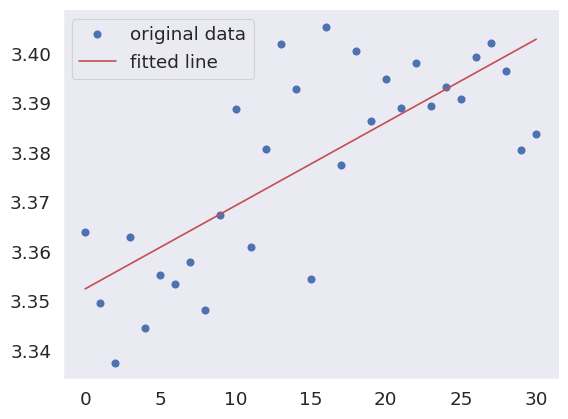

---------------------
pH_7.9
4,7uM
R-squared: 0.875772
I=12.59373+(0.006t)
Mean=12.683670
SEM=0.009791


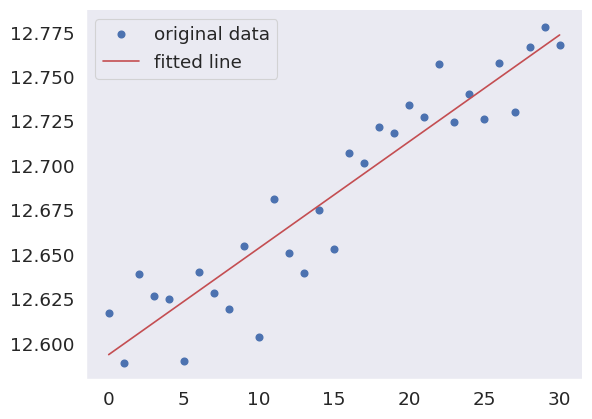

---------------------
pH_7.9
15uM
R-squared: 0.873667
I=34.5497+(0.02175t)
Mean=34.875948
SEM=0.035517


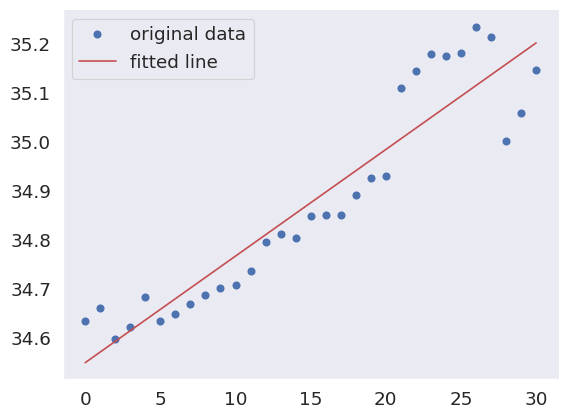

---------------------
pH_7.9
47uM
R-squared: 0.961725
I=132.20327+(0.04472t)
Mean=132.874075
SEM=0.073028


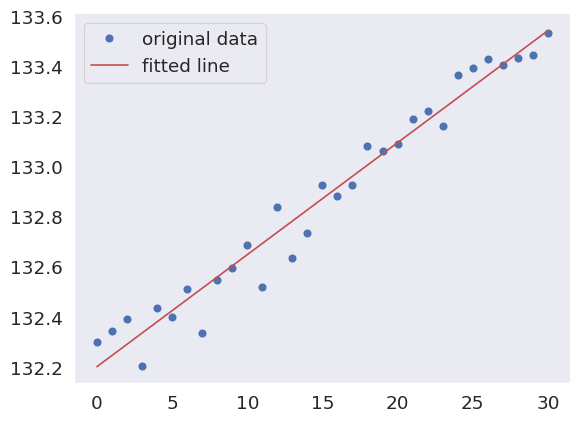

---------------------
pH_7.9
150uM
R-squared: 0.958393
I=285.0168+(0.0833t)
Mean=286.266269
SEM=0.136025


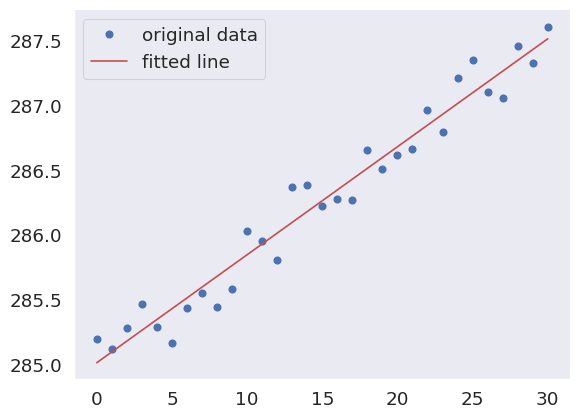

---------------------
len(mean)=11
len(SEM)=11
len(concentration)=11
########################################################################################
pH_9.0
1,5uM
R-squared: 0.996148
I=73.22404+(0.0873t)
Mean=74.533543
SEM=0.142561


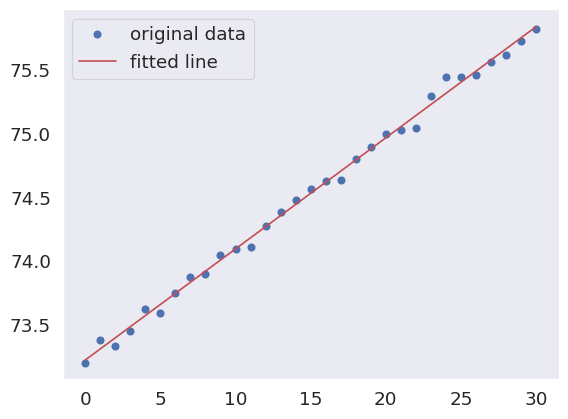

---------------------
pH_9.0
4,7uM
R-squared: 0.997357
I=294.91352+(0.33014t)
Mean=299.865602
SEM=0.539114


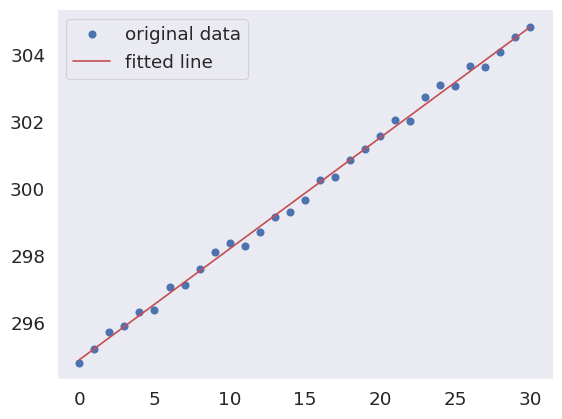

---------------------
pH_9.0
15uM
R-squared: 0.997994
I=364.06215+(0.59117t)
Mean=372.929634
SEM=0.965369


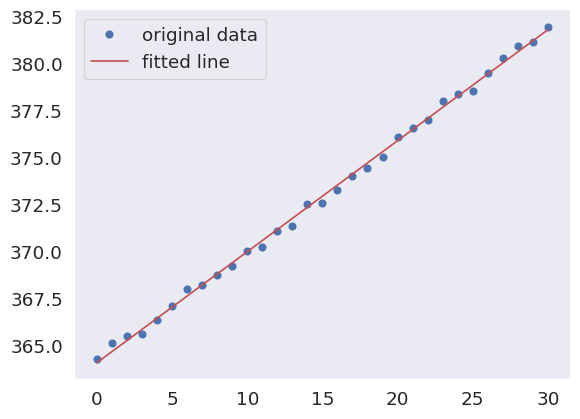

---------------------
pH_9.0
47uM
R-squared: 0.998810
I=25.31902+(0.5098t)
Mean=32.966020
SEM=0.832500


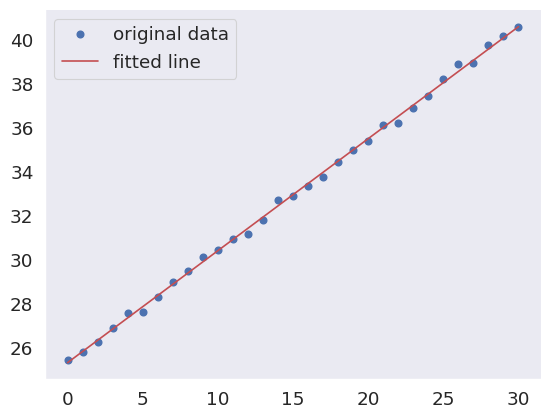

---------------------
pH_9.0
150uM
R-squared: 0.995282
I=95.99651+(1.63167t)
Mean=120.471544
SEM=2.664504


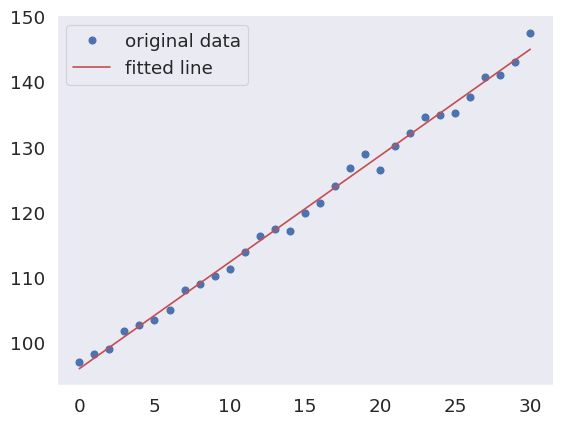

---------------------
len(mean)=16
len(SEM)=16
len(concentration)=16
########################################################################################


In [296]:
## Data Import and Initial Processing
# This section cleans up the .txt files supplied by Nikos.

from pathlib import Path

# path where files are stored
dir_path = "/content/drive/MyDrive/Colab Notebooks/Nanobio 1/Practicals/MM/"
# defining empty df
MM_data = pd.DataFrame(columns=['Data Series', 'Concentration', 'Time', 'Intensity'])

# Array of all .txt files located at 'dir_path' - including subdirectories
paths_list = Path(dir_path).glob('**/*.txt')

# loop opens all the .txt files one by one
for path in paths_list:
  file_path = str(path)

  # empty array for storing the lines of the i'th file
  lines = []

  # open the i'th file as 'f'
  with open (file_path, 'rt') as f:

    # dir of the i'th file
    file_dir_i = os.path.basename(os.path.dirname(path))
    # name of the ith file
    filename_i = os.path.basename(f.name).rstrip('.txt')

    # 2nd loop inside the 1st loop; processes each line of the i'th file.
    for line in f:

      # regular expression for replacing tabs with commas - and removing newline char '\n'
      line = line.replace('\t', ', ').rstrip('\n')

      # Store each line as a string in the empty array
      lines.append(line)

    # remove the top 18 lines (metadata)
    lines = lines[18:]

    # defining two empty array
    res_0 = []
    res_1 = []

    # Third loop for splitting the strings into floats
    for element in lines:

      # in each line, split at the comma -> store the two floats from each line in a tuple
      res = tuple(map(float, element.split(', ')))

      # Store the two floats in seperate arrays (time and intensity)
      res_0.append(res[0])
      res_1.append(res[1])

    # Store the extracted data in a temporary df
    res_df = pd.DataFrame( list(zip(res_0, res_1)), columns=['Time', 'Intensity'])
    res_df['Data Series'] = file_dir_i
    res_df['Concentration'] = filename_i

    # the open file 'f' is closed after this line

  # with 'f' closed, add the temp. df to a master-df.
  MM_data = pd.concat([MM_data, res_df], ignore_index=True)

# When the loop has processed all .txt-files, store the master-df as .csv (for backup).
MM_data.to_csv( os.path.join(dir_path, 'MM_data'  + '.' + 'csv') )


# ----------------------------------------------------------------------------------------------------------------------------------


## Further Data Processing

## Array listing all unique concentration series
#np.sort(MM_data['Concentration'].unique())
##
## Use values from array to create regex: '[\W_][1-4]' [filter for alphanumeric char (here: underscore) and a single integer (in the range 1-4)]
##
## Test regex using 'pandas.Series.str.findall' - or https://regexr.com/
## Implement using 'pandas.DataFrame.replace':
MM_data['Concentration'] = MM_data['Concentration'].replace(to_replace=[r'[\W_][1-4]'], value='', regex=True)

## Group data by 'Data Series', 'Concentration', and 'Time'; all data entries having these values in common -> arithmic mean.
MM_data_grouped = MM_data.groupby(['Data Series', 'Concentration', 'Time'], as_index=False).mean(numeric_only=True) # as_index=False retains orignal index
MM_data_grouped = MM_data_grouped.rename(columns={"Intensity": "Mean"})

## Use same method for creating a column containing the Standard Error of the Mean (SEM).
MM_data_grouped['SEM'] = MM_data.groupby(['Data Series', 'Concentration', 'Time'], as_index=False).sem(numeric_only=True)['Intensity'].fillna(0)
MM_data_grouped


# ----------------------------------------------------------------------------------------------------------------------------------


## data separation

## Conc lists for indexing
def concentration_index():
  if data_series_var == 'calibration':
    return ['10pM', '100pM', '1nM', '10nM', '50nM', '100nM']
  if data_series_var == 'pH_7.9' or data_series_var == 'pH_9.0':
    return ['1,5uM', '4,7uM', '15uM', '47uM', '150uM']
  else:
    raise TypeError("Wanted strawberry, got grape.") #Out Of Bounds Exception

# defining empty arrays for the loops below
series_array = []
mean_array = []
sem_array = []
conc_array = []

data_series_var = ['calibration', 'pH_7.9', 'pH_9.0']

# doing calculations for 'calibration', 'pH_7.9', and 'pH_9.0' - one at a time
for j in data_series_var:

  # variable for slicing the dfs below
  data_series_var = j

  ## dfs
  time_results = MM_data[MM_data['Data Series'] == data_series_var].groupby(['Concentration'], as_index=True, sort=True).agg({"Time": lambda x: list(x)})
  intensity_results = MM_data[MM_data['Data Series'] == data_series_var].groupby(['Concentration'], as_index=True, sort=True).agg({"Intensity": lambda x: list(x)})
  # for each unique value of 'Time', calculate the mean (emsemble averaging?)
  intensity_mean = MM_data_grouped[MM_data_grouped['Data Series'] == data_series_var].groupby(['Concentration'], as_index=True, sort=True).agg({"Mean": lambda x: list(x)})
  ## .. and the SEM
  ##intensity_SEM = MM_data_grouped[MM_data_grouped['Data Series'] == data_series_var].groupby(['Concentration'], as_index=True, sort=True).agg({"SEM": lambda x: list(x)})

  ## New dfs
  # hotfix for gathering the data from above
  plotting_data = time_results.merge(intensity_results, left_on='Concentration', right_on='Concentration')
  plotting_data = plotting_data.merge(intensity_mean, left_on='Concentration', right_on='Concentration')
  ##plotting_data = plotting_data.merge(intensity_SEM, left_on='Concentration', right_on='Concentration') # SEMs - but done before linear regression. Not useful?

  # 2nd loop inside the 1st loop
  # loops over each concentration for each value of j
  for i in concentration_index():

    # prints j and i in the output
    print(j)
    print(i)

    # variables for using inside this loop
    mean = np.array(plotting_data['Mean'].loc[i])
    t_mean = np.arange(len(np.array(plotting_data['Mean'].loc[i]).tolist())) #np.arange(11)

    ## if statement:
    # DON'T (?) do linear regression for the calibration date; do time averaging instead (?).
    #
    if j == 'pH_7.9' or j == 'pH_9.0':

      # linear regression
      res = stats.linregress(t_mean, mean)
      print(f"R-squared: {res.rvalue**2:.6f}")
      print("I=" + str(round(res.intercept, 5)) + "+(" + str(round(res.slope, 5)) + "t)")

      # using the regression line, calculate the mean Intensity across the entire interval (time averaging)
      # This value is also described as the "the average signal".
      mean_value = (np.mean((np.ones(len(np.array(plotting_data['Mean'].loc[i]).tolist())) * res.intercept) + (res.slope*t_mean)))
      # ... and the Standard Error of the Mean (SEM);
      #
      # "Standard error estimates the likely accuracy of a number based on the sample size
      # Standard error of the mean, or SEM, indicates the size of the likely discrepancy compared to that of the larger population."
      #
      # "he SEM describes how precise the mean of the sample is as an estimate of the true mean of the population.
      #
      # "As the size of the sample data grows larger, the SEM decreases vs. the SD. As the sample size increases,
      #  the sample mean estimates the true mean of the population with greater precision."
      #
      #  - https://www.investopedia.com/ask/answers/042415/what-difference-between-standard-error-means-and-standard-deviation.asp#:~:text=Standard%20error%20of%20the%20mean%20(SEM)%20measures%20how%20far%20the,always%20smaller%20than%20the%20SD.
      #
      #
      # => use sem for defining the size of the error bars. SEM seems to be the best measure in this case, but I could be wrong.
      #    (Standard deviation, RMSD, MSD are other options)
      #
      SEM_value = (stats.sem((np.ones(len(np.array(plotting_data['Mean'].loc[i]).tolist())) * res.intercept) + (res.slope*t_mean))) # SEMs - done after linear regression. More useful?

      ## plots - plots are optional and only for convenience of visualing intermediate results
      plt.plot(t_mean, mean, 'o', label='original data')
      # plotsthe regression line
      plt.plot(t_mean, res.intercept + res.slope*t_mean, 'r', label='fitted line')

    # Because the calibration is supposed be horizontal and independent of time anyway
    if j == 'calibration':

      # time averaging
      mean_value = np.mean(mean)
      # sem
      SEM_value = stats.sem(mean)
      # optional plot
      #plt.plot(i, mean_value, 'o', label='Arithmic Mean')
      plt.errorbar(i, mean_value, SEM_value, linestyle='None', capsize=5, marker='o', label='Arithmic Mean \n With SEM')

      # code for doing error plots
      #kwargs = {"capsize": .05,}
      #plot = sns.pointplot(data=df, y='D', x='Data_Series', errorbar=('sd'), **kwargs);
      #plot.figure.subplots_adjust(top=0.8);
      #plot.figure.suptitle("Arithmetic Mean and Standard Deviation");
      #plot.set(ylabel=r'Diffusion Coefficient, $D$ $\left[ \mathrm{cm}{^2}/\mathrm{s}{} \right]$', xlabel='Data Series');


    print(f"Mean={mean_value:.6f}")
    print(f"SEM={SEM_value:.6f}")
    # append arrays
    mean_array = np.append(mean_array, mean_value)
    sem_array = np.append(sem_array, SEM_value)
    conc_array = np.append(conc_array, i)

    plt.legend()
    plt.show()

    print("---------------------")


  series_array = np.append(series_array, j)
  print("len(mean)=" + str(len(mean_array)))
  print("len(SEM)=" + str(len(sem_array)))
  print("len(concentration)=" + str(len(conc_array)))
  print("########################################################################################")


##
## Litteraturre used for figuring the right order of operations:
##
## https://chem.libretexts.org/Courses/Duke_University/CHEM_401L%3A_Analytical_Chemistry_Lab_Manual/02%3A_Quantitative_Techniques_and_Calibration/2.05%3A_Uncertainty_in_values_determined_from_a_Calibration_Curve
##
## https://chem.libretexts.org/Bookshelves/Analytical_Chemistry/Analytical_Chemistry_2.1_(Harvey)/05%3A_Standardizing_Analytical_Methods/5.04%3A_Linear_Regression_and_Calibration_Curves
##

In [286]:
## A method for slicing the extracted data

# calibration curve
# conc_array[slice(0,6)] ;  mean_array[slice(0,6)] ;  sem_array[slice(0,6)]

# pH 7.9
# conc_array[slice(6, 6+5)] ;  mean_array[slice(6, 6+5)] ;  sem_array[slice(6, 6+5)]

# pH 9.0
# conc_array[slice(6+5, 6+5+5)] ;  mean_array[slice(6+5, 6+5+5)] ;  sem_array[slice(6+5, 6+5+5)]

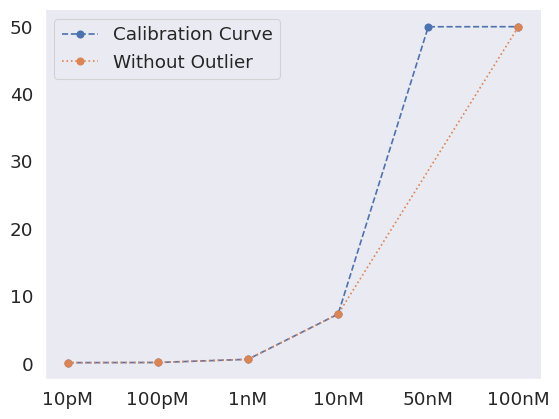

[0.13401515, 0.16101515, 0.63264242, 7.34466364, 49.96993636]

In [294]:
# calibration curve

x = conc_array[slice(0,6)]
y = mean_array[slice(0,6)]
y_err = sem_array[slice(0,6)]
plt.plot(x, y, 'o', label='Calibration Curve', linestyle = '--')

x = ['10pM', '100pM', '1nM', '10nM', '100nM']
y = [0.13401515,  0.16101515,  0.63264242,  7.34466364, 49.96993636]

plt.plot(x, y, 'o', label='Without Outlier', linestyle = ':')
plt.legend()
plt.show()

In [ ]:
## pH curves

x = conc_array[slice(6, 6+5)]
y = mean_array[slice(6, 6+5)]
y_err = sem_array[slice(6, 6+5)]
plt.plot(x, y, 'o', label='pH 7.9', linestyle = '--')
plt.legend()
plt.show()


x = conc_array[slice(6+5, 6+5+5)]
y = mean_array[slice(6+5, 6+5+5)]
y_err = sem_array[slice(6+5, 6+5+5)]
plt.plot(x, y, 'o', label='pH 9.0', linestyle = '--')
x = ['1,5uM', '4,7uM', '15uM', '150uM']
y = [ 74.53354274, 299.86560215, 372.92963441, 120.47154409]
plt.plot(x, y, 'o', label='Without outlier', linestyle = ':')
plt.legend()
plt.show()

## Diffusion Coefficient

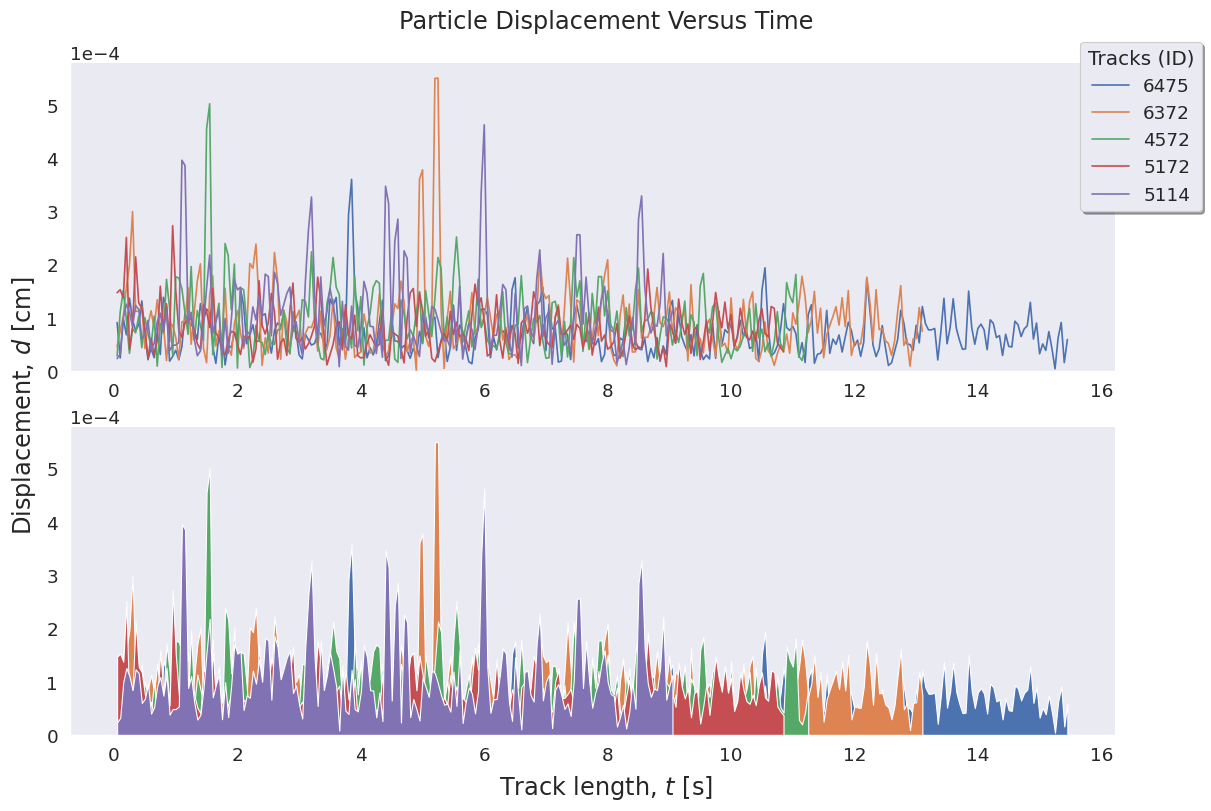

In [ ]:
#data_list = list(zip())

fig, (ax1, ax2) = plt.subplots(2, figsize = (12, 8), sharex=False, sharey=True, layout='constrained')

## List of tracks sorted by size. Length of list determines the readability of the plots
######### Slice the list length by changing the integer i; here [0:i]                     and here [0:i]
zipped_list = zip(np.arange(tracks_by_size.shape[0], dtype='int')[0:5], tracks_by_size.astype('int')[0:5])


# plotting loop
for i,j in zipped_list:  # np.arange(tracks_by_size.shape[0]) # np.arange(0, 5)
  t = np.arange(1, data_links['DISPLACEMENT'].loc[data_links['TRACK_ID'] == tracks_by_size[i]].shape[0]+1)*0.05
  d = np.array(data_links['DISPLACEMENT'].loc[data_links['TRACK_ID'] == tracks_by_size[i]])*6.25*1e-4

  ax1.plot(t, d, label=j)
  ax2.stackplot(t, d)

# combining all plots from the loop
ax1.legend(loc='upper center', bbox_to_anchor=(1.025, 1.1), ncol=1, fancybox=True, shadow=True, title='Tracks (ID)')
fig.supxlabel(r'Track length, $t$ [s]');
fig.supylabel(r'Displacement, $d$ [cm]');
fig.suptitle(r'Particle Displacement Versus Time')
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0), useMathText=False)
plt.show()

In [ ]:
# units are wrong; need to be corrected in ImageJ before analysis.
# Good guide from JMU: https://www.jmu.edu/microscopy/resources/basic-image-processing-imagej.pdf
# Also read best practices for data analysis and presentation!

tracks_units
#file_tracks.sort_values(by=['TRACK_DURATION'], ascending=False)

,LABEL,TRACK_INDEX,TRACK_ID,NUMBER_SPOTS,NUMBER_GAPS,NUMBER_SPLITS,NUMBER_MERGES,NUMBER_COMPLEX,LONGEST_GAP,TRACK_DURATION,...,TRACK_MIN_SPEED,TRACK_MEDIAN_SPEED,TRACK_STD_SPEED,TRACK_MEAN_QUALITY,TOTAL_DISTANCE_TRAVELED,MAX_DISTANCE_TRAVELED,CONFINEMENT_RATIO,MEAN_STRAIGHT_LINE_SPEED,LINEARITY_OF_FORWARD_PROGRESSION,MEAN_DIRECTIONAL_CHANGE_RATE
1,Label,Index,ID,N spots,N gaps,N splits,N merges,N complex,Lgst gap,Duration,...,Min speed,Med. speed,Std speed,Mean Q,Total dist.,Max dist.,Cfn. ratio,Mn. v. line,Fwd. progr.,Mn. ? rate
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(sec),...,(pixel/sec),(pixel/sec),(pixel/sec),(quality),(pixel),(pixel),NaN,(pixel/sec),NaN,(rad/sec)


In [ ]:
# diffusion coefficient

# changing data units
index = file_tracks.index.tolist()
df = pd.DataFrame(file_tracks.TRACK_ID)
df['TRACK_DURATION'] = file_tracks.TRACK_DURATION*0.05 # 50 ms/frame = 0.05 s/frame (20.0 frames/s)
df['TRACK_DISPLACEMENT'] = file_tracks.TRACK_DISPLACEMENT*6.25  # 512e-6 m / 81.92 px = 6.25 µm/px
df['TRACK_DISPLACEMENT'] = df['TRACK_DISPLACEMENT']*1e-4  # 1 µm = 1e-4 cm

# r-squared and D
df['r2'] = (df.TRACK_DISPLACEMENT ** 2)
df['D'] = ( (df.TRACK_DISPLACEMENT ** 2) / ( 4 * df.TRACK_DURATION) )

# interpretting results: https://www.comsol.com/multiphysics/diffusion-coefficient
# In an aqueous (water) solution, typical diffusion coefficients are in the range of 1e-10 to 1e-9 m2/s

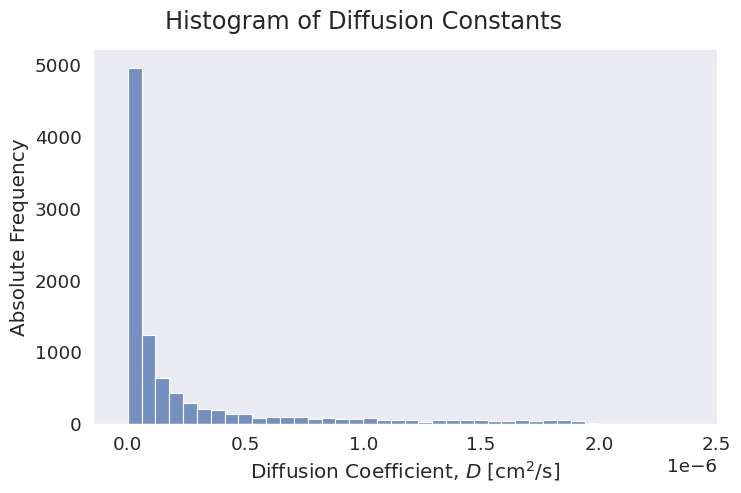

In [ ]:
# histogram using Seaborn + matplotlib

plot = sns.displot(data=df, x="D", kind="hist", kde=False, bins = 50, aspect = 1.5, legend=True)
plot.figure.subplots_adjust(top=0.9);
plot.figure.suptitle("Histogram of Diffusion Constants");
plot.set(xlabel=r'Diffusion Coefficient, $D$ $\left[ \mathrm{cm}{^2}/\mathrm{s}{} \right]$', ylabel='Absolute Frequency', xlim=(None, 2.5e-6));

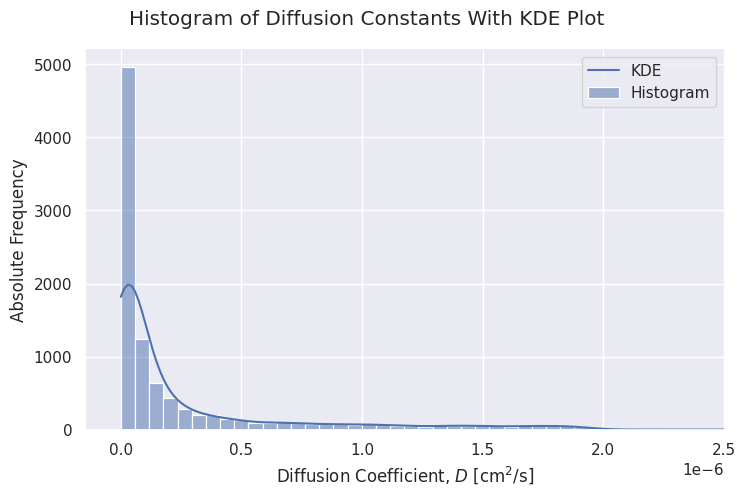

In [ ]:
# histogram + kernel density estimate (KDE) plot

plot = sns.displot(data=df, x="D", kind="hist", kde=True, bins = 50, aspect = 1.5)
plot.figure.subplots_adjust(top=0.9);
plot.figure.suptitle("Histogram of Diffusion Constants With KDE Plot");
plot.set(xlabel=r'Diffusion Coefficient, $D$ $\left[ \mathrm{cm}{^2}/\mathrm{s}{} \right]$', ylabel='Absolute Frequency', xlim=(None, 2.5e-6));
plt.legend(labels=["KDE","Histogram"]); # kernel density estimate (KDE) plot

In [ ]:
# adding label to the df
df['Data_Series'] = 'pH 9 #2'

D_statistics = df.groupby(['Data_Series'])['D'].describe()[['mean','std']]
D_statistics

,mean,std
Data_Series,,
pH 9 #2,2.521810e-07,4.333217e-07


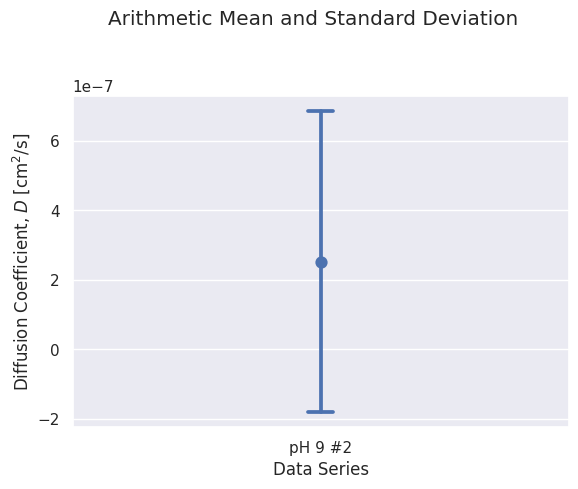

In [ ]:
# code for doing error plots

kwargs = {"capsize": .05,}
plot = sns.pointplot(data=df, y='D', x='Data_Series', errorbar=('sd'), **kwargs);
plot.figure.subplots_adjust(top=0.8);
plot.figure.suptitle("Arithmetic Mean and Standard Deviation");
plot.set(ylabel=r'Diffusion Coefficient, $D$ $\left[ \mathrm{cm}{^2}/\mathrm{s}{} \right]$', xlabel='Data Series');

## Code Snippets From Workshop

In [ ]:
particle = file_spots[file_spots['TRACK_ID']==0].sort_values(by=['POSITION_T'], ascending=True)

particle_coordinates = pd.DataFrame(columns=['PARTICLE_ID', 'TRACK_ID', 'x', 'y'])

df_temp = pd.DataFrame(columns=['PARTICLE_ID', 'TRACK_ID', 'x', 'y', 'r'])
for i in range(particle.shape[0]):
    df_temp.loc[i, ['PARTICLE_ID']] = particle['ID'].iloc[i]
    df_temp.loc[i, ['TRACK_ID']] = particle['TRACK_ID'].iloc[i]
    df_temp.loc[i, ['x']] = particle['POSITION_X'].iloc[i]
    df_temp.loc[i, ['y']] = particle['POSITION_Y'].iloc[i]
    df_temp.loc[i, ['r']] = np.sqrt(df_temp['x'].iloc[i]**2 + df_temp['y'].iloc[i]**2)
    df_temp.loc[i, ['direction']] = np.rad2deg( np.arctan(np.tan(df_temp['y'].iloc[i] / df_temp['x'].iloc[i])) )


df_temp

,PARTICLE_ID,TRACK_ID,x,y,r,direction
0,133777.0,0.0,31.763985,16.798916,35.932636,30.301832
1,133890.0,0.0,31.565218,16.70401,35.71256,30.320374
2,133661.0,0.0,31.838095,16.81354,36.004991,30.257614
3,134155.0,0.0,31.727179,16.536827,35.778213,29.863682


In [ ]:
plt.hist(unique_entries['Duration'], bins=150, log=True, density=True)
#labels, title
plt.show()

NameError: ignored

In [ ]:
# For lab: r = k sqrt(I), k=1.39
# -> plot relative freq vs diameter (nm)
#For this exercise: r = k * sqrt(m)

In [ ]:
r = 1.39*np.sqrt(unique_entries['mass']) * 160

from scipy import stats
hist, bins = np.histogram(r, bins=100, range=(250, 700))
shape, loc, scale = stats.lognorm.fit(r)
pdf_values = stats.lognorm.pdf(bins, shape, loc, scale)

plt.figure(figsize=(8, 6))
plt.hist(r, bins=100, log=False, density=True, alpha=0.7, label="Histogram", edgecolor='midnightblue')
plt.plot(bins, pdf_values, 'r-', lw=1, label='Lognormal Distribution')
plt.title('Some title')
plt.xlabel('Size')
plt.ylabel('Probability Density')
plt.xlim(250, 700)
plt.legend()
plt.show()
print(stats.lognorm.fit(r))

# Out of Scope

## Data Restructuring

### Loops and Functions

In [ ]:
## Function for restructuring data into new DF

## pre-loop setup
# array of TRACK_IDs of tracks - sorted by number of spots (i.e., length of track minus gaps)
tracks_by_size = file_tracks.sort_values(by=['NUMBER_SPOTS'], ascending=False)['TRACK_ID'].to_numpy(dtype=None, copy=True)

# initiate empty, zipped list outside loop
zip_data = list(zip([], [], [], [], [], [])) # might not be necessary

## for loop iterating over all tracks
for i in np.arange(tracks_by_size.shape[0]):

  ## preamble
  # defines track ID for current iteration
  get_track_id = np.array(tracks_by_size[int(i)], dtype=float).item() # to scalar
  # spots sorted by time - to get them in chronological order
  particle = file_spots[file_spots['TRACK_ID']==get_track_id].sort_values(by=['POSITION_T'], ascending=True)

  ## variables of each iteration
  t = np.arange(particle.shape[0])
  # absolute coordinates
  x = np.array(particle['POSITION_X'])
  y = np.array(particle['POSITION_Y'])
  # absolute position
  r = np.sqrt(( x**2 ) + ( y**2 ))
  #theta = np.rad2deg( np.arctan(y / x) )
  # position of the spot corresponding to tau=0
  r_0 = r[0:1].item() # to scalar

  ## data lists
  id_list = np.ndarray.tolist(np.ones(particle.shape[0])*get_track_id)
  t_list = np.ndarray.tolist(t)
  r_list = r-r_0 ## relative distance from position at tau=0 ≈ relative deviation
  r_list_std = r # absolute position
  x_list = x
  y_list = y

  ## tuples
  # zip all lists together to one tuple
  zip_data_temp = list(zip(id_list, t_list, r_list, r_list_std, x_list, y_list))
  # expand zip_data master tuple w content of temporary tuple zip_data_temp each iteration
  zip_data = zip_data+zip_data_temp

# generate df from tuple - outside loop
data = pd.DataFrame(data=zip_data, columns=['track_ID', 't', 'r_relative', 'r', 'x', 'y'])

In [ ]:
# different functions outputting dfs with specific particle data
def track_position_relative(track_number):
  return data['r_relative'].loc[data['track_ID'] == tracks_by_size[track_number]]

def track_position(track_number):
  return data['r'].loc[data['track_ID'] == tracks_by_size[track_number]]

def track_t(track_number):
  return data['t'].loc[data['track_ID'] == tracks_by_size[track_number]]

def particles_position(time):
  return data['r'].loc[data['t'] == time]

def track_x(track_number):
  return data['x'].loc[data['track_ID'] == tracks_by_size[track_number]]

def track_y(track_number):
  return data['y'].loc[data['track_ID'] == tracks_by_size[track_number]]

In [ ]:
## loop for extending df 'data' with spot IDs.
# Possible to match with displacement?

zipped_data = list(zip([], []))

for i in np.arange(tracks_by_size.shape[0]): # np.arange(tracks_by_size.shape[0])

  # Isolate particle IDs based on TRACK_ID, sorted chronologically
  spots_df = file_spots[file_spots['TRACK_ID']==(np.array(tracks_by_size[int(i)], dtype=float).item())].sort_values(by=['POSITION_T'], ascending=True)
  spots_df = spots_df.rename(columns={"ID": "SPOT_ID"})
  spots_df = spots_df['SPOT_ID']
  spots_ID_list = spots_df.values.tolist()

  #data_temp = data.merge(data_trackID[['track_ID', 'SPOT_ID']])

  tracks_ID_list = data.loc[data['track_ID'] == (np.array(tracks_by_size[int(0)], dtype=float).item())]['track_ID']

  zipped_data_temp = list(zip(tracks_ID_list, spots_ID_list))
  zipped_data = zipped_data+zipped_data_temp

# creates df from loop data
data_IDs_temp = pd.DataFrame(data=zipped_data, columns=['track_ID', 'SPOT_ID'])
# create new df
data_extended = data
#add data from temp df
data_extended['SPOT_ID'] = data_IDs_temp['SPOT_ID']
del data_IDs_temp
# reorder cols
cols_in_data_extended = ['track_ID', 'SPOT_ID', 't', 'r_relative', 'r', 'x', 'y']
data_extended = data_extended[cols_in_data_extended]
data_extended = data_extended.rename(columns={"track_ID": "TRACK_ID"})

In [ ]:
## file_links - displacement
#
# data_extended[data_extended['TRACK_ID'] == (np.array(tracks_by_size[int(1)], dtype=float).item())]
file_links.sort_values(by=['EDGE_TIME'], ascending=False).columns.tolist()
file_links_cols = ['TRACK_ID', 'SPOT_SOURCE_ID', 'SPOT_TARGET_ID', 'DISPLACEMENT','EDGE_TIME']
file_links_reduced = file_links[file_links_cols]

# Particles still match up in both dfs; correct chronological order when comparing T_position and edge_time.
#data_extended[data_extended['TRACK_ID'] == 6475.0]
#file_links_reduced[file_links_reduced['TRACK_ID'] == 6475.0]
#file_links[file_links_reduced['TRACK_ID'] == 6475.0]

data_links = pd.DataFrame(file_links_reduced.sort_values(by=['EDGE_TIME'], ascending=True)) # by definition sorted by edge time
#file_links.sort_index(ascending=False)

In [ ]:
## Counting the number of NaN values
# .isnull().sum();
# DIRECTIONAL_CHANGE_RATE:    9752
#
# .notnull().sum();
# DIRECTIONAL_CHANGE_RATE:    32964
#
# % NaN values: ( 9752 / 32964 ) * 100 = 29.583788375197184
# - DIRECTIONAL_CHANGE_RATE=NaN when linear displacement occurs
# - BUT there's 9752 tracks in the dataset, and the first displacement of each track will default to NaN in all cases.
# => linearity -> 0 when analysing at this indicator.
# No linearity is observed when analysing links

# However

## LINEARITY_OF_FORWARD_PROGRESSION:
#file_tracks[file_tracks['LINEARITY_OF_FORWARD_PROGRESSION']==1].shape[0] # no. linear tracks = 5254
#file_tracks[file_tracks['LINEARITY_OF_FORWARD_PROGRESSION']!=1].shape[0] # no. non-linear tracks = 4498
#
# (4498/5254)*100 = 85.61096307575181
#
# 85.6% of TRACKS seem to have 100% linearity. Assumption: linear regression over all links in the track?

### Graphs

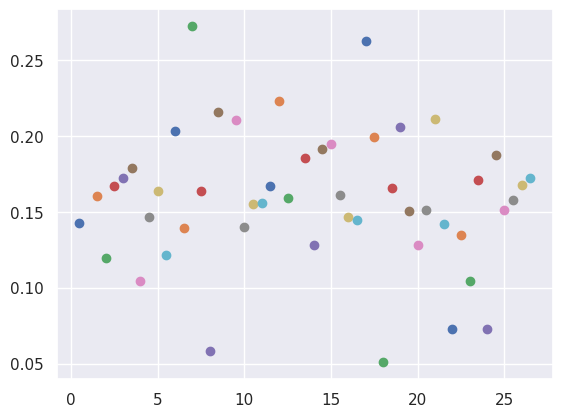

In [ ]:
# @title
## loop plot - median displacement vs time

# import Seaborn & set theme
import seaborn as sns
sns.set_theme()
sns.color_palette('pastel')
#sns.set_style("whitegrid")
#sns.set_style("darkgrid")


time_list = list(np.unique(data_links.EDGE_TIME.to_numpy(copy=True)))

for i in np.arange(0, 50):  # np.arange(np.unique(data_links.EDGE_TIME.to_numpy(copy=True)).size)
  t = time_list[i]
  d = list(data_links['DISPLACEMENT'].loc[data_links['EDGE_TIME'] == time_list[i]])
  mean = np.mean(d)
  #std = np.std(d) # error
  #plt.errorbar(t, mean, yerr=std, fmt='o', capsize=6) # color='mediumvioletred'
  plt.scatter(t, mean)

plt.show;

## AutoViz Plots

In [ ]:
## AutoViz plots
#!pip install autoviz --upgrade # run once per runtime
from autoviz.AutoViz_Class import AutoViz_Class
import autoviz.AutoViz_Utils as AVU
from google.colab import autoviz
%matplotlib inline
AV = AutoViz_Class()

file_links_cols = ['TRACK_ID', 'DISPLACEMENT','EDGE_TIME']
file_links_reduced = file_links[file_links_cols]

target_variable = "DISPLACEMENT"
dft = AV.AutoViz(
    filename=None,
    dfte=file_links_reduced,
    sep=",",
    depVar=target_variable,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir=None
)

ModuleNotFoundError: ignored

In [ ]:
## position vs relative time
#data.sort_values(by=['t'], ascending=False)
#data

In [ ]:
#####
# t col to float
data['t'] = data['t'].astype('float32')
#####

df0 = data
#df0.to_csv('Data.csv')
df0 = df0.drop(['x', 'y'], axis=1)
#df0

In [ ]:
# plot from file OR df (dfte); for option not in use, use: =None
#filename = "Data.csv"
#dfte = df0
target_variable = "r_relative"
dft = AV.AutoViz(
    filename=None,
    dfte=df0,
    sep=",",
    depVar=target_variable,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir=None
)

In [ ]:
## Save plots to file
# plot from file OR df (dfte); for option not in use, use: =None
#filename = "your_file.csv"
#dfte = df0
target_variable = "r"
custom_plot_dir = "Plots"
dft = AV.AutoViz(
    filename=None,
    dfte=df0,
    sep=",",
    depVar=target_variable,
    header=0,
    verbose=2,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir=custom_plot_dir
)

In [ ]:
# summary
df0.describe()

In [ ]:
# @title
import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt;
  plt.figure(figsize=(6 * figscale, 6 * figscale));
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha);
  plt.gca().spines[['top', 'right',]].set_visible(False);
  plt.tight_layout();
  return autoviz.MplChart.from_current_mpl_state();

chart = scatter_plot(_df_5, *['t', 'r_relative'], **{});
chart

In [ ]:
# @title
import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['t', 'r_relative', None], **{})
chart

In [ ]:
# @title
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(data, *['r_relative'], **{})
chart

## Various Plots

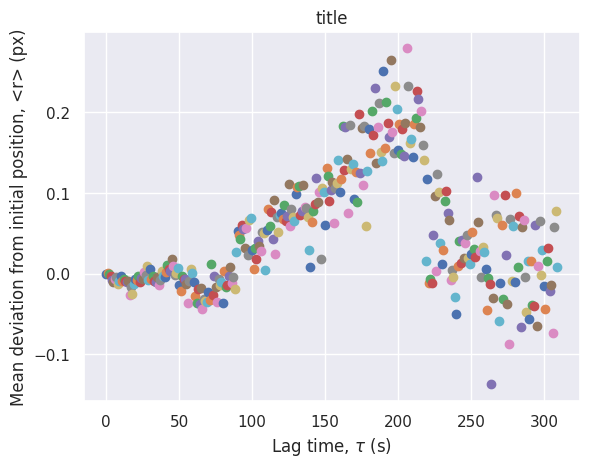

In [ ]:
for i in np.arange(318):
  mean_x = np.mean(data['r_relative'].loc[data['t'] == i])
  plt.scatter(i, mean_x)
plt.xlabel(r'Lag time, $\tau$ (s)')
plt.ylabel(r'Mean deviation from initial position, <r> (px)')
plt.title('title')
plt.grid(True)
plt.show;

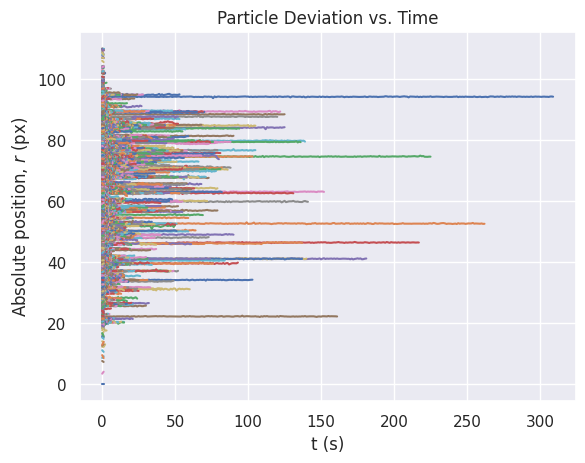

In [ ]:
for i in np.arange(tracks_by_size.shape[0]):
  plt.plot(track_t(i), track_position(i))
plt.xlabel(r't (s)')
plt.ylabel(r'Absolute position, $r$ (px)')
plt.title(r'Particle Deviation vs. Time')
plt.grid(True)
plt.show;

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


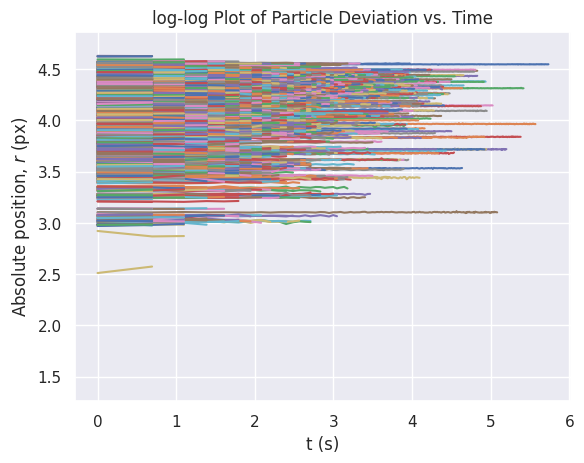

In [ ]:
for i in np.arange(0, (tracks_by_size.shape[0]-1), 1):
  plt.plot(np.log(track_t(i)), np.log(track_position(i)), "-")
plt.xlabel(r't (s)')
plt.ylabel(r'Absolute position, $r$ (px)')
plt.title(r'log-log Plot of Particle Deviation vs. Time')
plt.grid(True)
plt.show;

In [ ]:
## test: [:] vs [::]
#r = np.array(data.loc[data['track_ID'] == tracks_by_size[0]]['r'])
#r[0::10]
#t = np.array(data.loc[data['track_ID'] == tracks_by_size[0]]['t'])
#t[0::10]

In [ ]:
for i in np.arange(0, 1): # np.arange(0, (tracks_by_size.shape[0]-1), 1)
  #r_range = []
  #t_range = []
  MSD_list = []
  for j in np.arange(0, ((data.loc[data['track_ID'] == tracks_by_size[i]]['r']).shape[0]), 10): #
    if j < max(np.arange(0, ((data.loc[data['track_ID'] == tracks_by_size[i]]['r']).shape[0])-10, 10)):
      r_entry = np.array(data.loc[data['track_ID'] == tracks_by_size[i]]['r'])
      #r_range = np.append(r_range, r_entry[0+j:10+j])
      MSD_range = np.mean(r_entry[0+j:10+j]**2)
      MSD_list = np.append(MSD_list, MSD_range)
      t_entry = np.array(data.loc[data['track_ID'] == tracks_by_size[i]]['t'])
      t_range = t_entry[0+j::10+j]
      print(t_range)
  #print(MSD_list)

  #print(t_range)
  #plt.plot(t_range, r_range);
#plt.show;



#for i in np.arange(0, 301, 20): #only goes to 300
#  r_range = []
#  for j in np.arange(0, 20):
#    r_entry = np.mean(data['r_relative'].loc[data['t'] == (i+j)]) # ensembly average for t=i+j
#    r_range = np.append(r_range, r_entry)
#  MSD_range = np.mean(r_range**2)
#  MSD = np.append(MSD, MSD_range)

[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190 200 210 220 230 240 250 260 270 280 290 300]
[ 10  30  50  70  90 110 130 150 170 190 210 230 250 270 290]
[ 20  50  80 110 140 170 200 230 260 290]
[ 30  70 110 150 190 230 270]
[ 40  90 140 190 240 290]
[ 50 110 170 230 290]
[ 60 130 200 270]
[ 70 150 230]
[ 80 170 260]
[ 90 190 290]
[100 210]
[110 230]
[120 250]
[130 270]
[140 290]
[150]
[160]
[170]
[180]
[190]
[200]
[210]
[220]
[230]
[240]
[250]
[260]
[270]
[280]


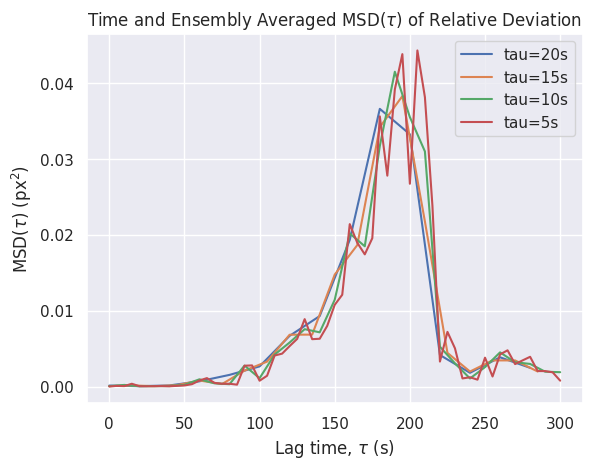

In [ ]:
## MSD from relative position

# plot tau=20
MSD = []
for i in np.arange(0, 301, 20): #only goes to 300
  r_range = []
  for j in np.arange(0, 20):
    r_entry = np.mean(data['r_relative'].loc[data['t'] == (i+j)]) # ensembly average for t=i+j
    r_range = np.append(r_range, r_entry)
  MSD_range = np.mean(r_range**2)
  MSD = np.append(MSD, MSD_range)
tau = np.arange(0, 301, 20)
plt.plot(tau, MSD, label='tau=20s')
# plot tau=15
MSD = []
for i in np.arange(0, 301, 15): #only goes to 300
  r_range = []
  for j in np.arange(0, 15):
    r_entry = np.mean(data['r_relative'].loc[data['t'] == (i+j)]) # ensembly average for t=i+j
    r_range = np.append(r_range, r_entry)
  MSD_range = np.mean(r_range**2)
  MSD = np.append(MSD, MSD_range)
tau = np.arange(0, 301, 15)
plt.plot(tau, MSD, label='tau=15s')
# plot tau=10
MSD = []
for i in np.arange(0, 301, 10): #only goes to 300
  r_range = []
  for j in np.arange(0, 10):
    r_entry = np.mean(data['r_relative'].loc[data['t'] == (i+j)]) # ensembly average for t=i+j
    r_range = np.append(r_range, r_entry)
  MSD_range = np.mean(r_range**2)
  MSD = np.append(MSD, MSD_range)
tau = np.arange(0, 301, 10)
plt.plot(tau, MSD, label='tau=10s')
# plot tau=5
MSD = []
for i in np.arange(0, 301, 5): #only goes to 300
  r_range = []
  for j in np.arange(0, 5):
    r_entry = np.mean(data['r_relative'].loc[data['t'] == (i+j)]) # ensembly average for t=i+j
    r_range = np.append(r_range, r_entry)
  MSD_range = np.mean(r_range**2)
  MSD = np.append(MSD, MSD_range)
tau = np.arange(0, 301, 5)
plt.plot(tau, MSD, label='tau=5s')
# plot tau=2
MSD = []
for i in np.arange(0, 301, 2): #only goes to 300
  r_range = []
  for j in np.arange(0, 2):
    r_entry = np.mean(data['r_relative'].loc[data['t'] == (i+j)]) # ensembly average for t=i+j
    r_range = np.append(r_range, r_entry)
  MSD_range = np.mean(r_range**2)
  MSD = np.append(MSD, MSD_range)
tau = np.arange(0, 301, 2)
#plt.plot(tau, MSD, label='tau=2s')

#plt.plot(MSD, np.log(MSD))
#plt.scatter(i, mean_x)
plt.xlabel(r'Lag time, $\tau$ (s)')
plt.ylabel(r'MSD($\tau$) (px$^2$)')
plt.title(r'Time and Ensembly Averaged MSD($\tau$) of Relative Deviation')
plt.grid(True)
plt.legend()
plt.show;

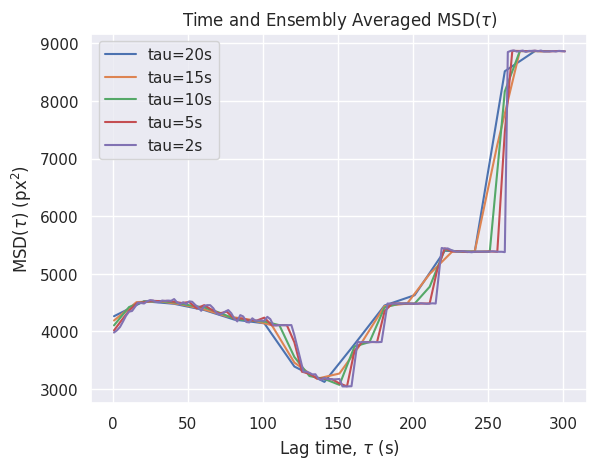

In [ ]:
## MSD from absolute position

# plot tau=20
MSD = []
for i in np.arange(1, 302, 20): #only goes to 300
  r_range = []
  for j in np.arange(0, 20):
    r_entry = np.mean(data['r'].loc[data['t'] == (i+j)]) # ensembly average for t=i+j
    r_range = np.append(r_range, r_entry)
  MSD_range = np.mean(r_range**2)
  MSD = np.append(MSD, MSD_range)
tau = np.arange(1, 302, 20)
plt.plot(tau, MSD, label='tau=20s')
# plot tau=15
MSD = []
for i in np.arange(1, 302, 15): #only goes to 300
  r_range = []
  for j in np.arange(0, 15):
    r_entry = np.mean(data['r'].loc[data['t'] == (i+j)]) # ensembly average for t=i+j
    r_range = np.append(r_range, r_entry)
  MSD_range = np.mean(r_range**2)
  MSD = np.append(MSD, MSD_range)
tau = np.arange(1, 302, 15)
plt.plot(tau, MSD, label='tau=15s')
# plot tau=10
MSD = []
for i in np.arange(1, 302, 10): #only goes to 300
  r_range = []
  for j in np.arange(0, 10):
    r_entry = np.mean(data['r'].loc[data['t'] == (i+j)]) # ensembly average for t=i+j
    r_range = np.append(r_range, r_entry)
  MSD_range = np.mean(r_range**2)
  MSD = np.append(MSD, MSD_range)
tau = np.arange(1, 302, 10)
plt.plot(tau, MSD, label='tau=10s')
# plot tau=5
MSD = []
for i in np.arange(1, 302, 5): #only goes to 300
  r_range = []
  for j in np.arange(0, 5):
    r_entry = np.mean(data['r'].loc[data['t'] == (i+j)]) # ensembly average for t=i+j
    r_range = np.append(r_range, r_entry)
  MSD_range = np.mean(r_range**2)
  MSD = np.append(MSD, MSD_range)
tau = np.arange(1, 302, 5)
plt.plot(tau, MSD, label='tau=5s')
# plot tau=2
MSD = []
for i in np.arange(1, 302, 2): #only goes to 300
  r_range = []
  for j in np.arange(0, 2):
    r_entry = np.mean(data['r'].loc[data['t'] == (i+j)]) # ensembly average for t=i+j
    r_range = np.append(r_range, r_entry)
  MSD_range = np.mean(r_range**2)
  MSD = np.append(MSD, MSD_range)
tau = np.arange(1, 302, 2)
plt.plot(tau, MSD, label='tau=2s')

#plt.plot(MSD, np.log(MSD))
#plt.scatter(i, mean_x)
plt.xlabel(r'Lag time, $\tau$ (s)')
plt.ylabel(r'MSD($\tau$) (px$^2$)')
plt.title(r'Time and Ensembly Averaged MSD($\tau$)')
plt.grid(True)
plt.legend()
plt.show;

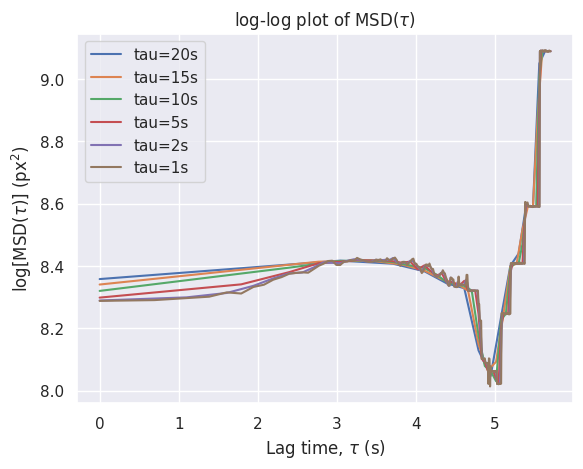

In [ ]:
## log-log plot of MSD from absolute position,

# plot tau=20
MSD = []
for i in np.arange(1, 302, 20): #only goes to 300
  r_range = []
  for j in np.arange(0, 20):
    r_entry = np.mean(data['r'].loc[data['t'] == (i+j)]) # ensembly average for t=i+j
    r_range = np.append(r_range, r_entry)
  MSD_range = np.mean(r_range**2)
  MSD = np.append(MSD, MSD_range)
tau = np.arange(1, 302, 20)
plt.plot(np.log(tau), np.log(MSD), label='tau=20s')
# plot tau=15
MSD = []
for i in np.arange(1, 302, 15): #only goes to 300
  r_range = []
  for j in np.arange(0, 15):
    r_entry = np.mean(data['r'].loc[data['t'] == (i+j)]) # ensembly average for t=i+j
    r_range = np.append(r_range, r_entry)
  MSD_range = np.mean(r_range**2)
  MSD = np.append(MSD, MSD_range)
tau = np.arange(1, 302, 15)
plt.plot(np.log(tau), np.log(MSD), label='tau=15s')
# plot tau=10
MSD = []
for i in np.arange(1, 302, 10): #only goes to 300
  r_range = []
  for j in np.arange(0, 10):
    r_entry = np.mean(data['r'].loc[data['t'] == (i+j)]) # ensembly average for t=i+j
    r_range = np.append(r_range, r_entry)
  MSD_range = np.mean(r_range**2)
  MSD = np.append(MSD, MSD_range)
tau = np.arange(1, 302, 10)
plt.plot(np.log(tau), np.log(MSD), label='tau=10s')
# plot tau=5
MSD = []
for i in np.arange(1, 302, 5): #only goes to 300
  r_range = []
  for j in np.arange(0, 5):
    r_entry = np.mean(data['r'].loc[data['t'] == (i+j)]) # ensembly average for t=i+j
    r_range = np.append(r_range, r_entry)
  MSD_range = np.mean(r_range**2)
  MSD = np.append(MSD, MSD_range)
tau = np.arange(1, 302, 5)
plt.plot(np.log(tau), np.log(MSD), label='tau=5s')
# plot tau=2
MSD = []
for i in np.arange(1, 302, 2): #only goes to 300
  r_range = []
  for j in np.arange(0, 2):
    r_entry = np.mean(data['r'].loc[data['t'] == (i+j)]) # ensembly average for t=i+j
    r_range = np.append(r_range, r_entry)
  MSD_range = np.mean(r_range**2)
  MSD = np.append(MSD, MSD_range)
tau = np.arange(1, 302, 2)
plt.plot(np.log(tau), np.log(MSD), label='tau=2s')
# plot tau=1
MSD = []
for i in np.arange(1, 302, 1): #only goes to 300
  r_range = []
  for j in np.arange(0, 1):
    r_entry = np.mean(data['r'].loc[data['t'] == (i+j)]) # ensembly average for t=i+j
    r_range = np.append(r_range, r_entry)
  MSD_range = np.mean(r_range**2)
  MSD = np.append(MSD, MSD_range)
tau = np.arange(1, 302, 1)
plt.plot(np.log(tau), np.log(MSD), label='tau=1s')

plt.xlabel(r'Lag time, $\tau$ (s)')
plt.ylabel(r'log[MSD($\tau$)] (px$^2$)')
plt.title(r'log-log plot of MSD($\tau$)')
plt.grid(True)
plt.legend()
plt.show;